In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

# DataPreparation

In [2]:
data_path='time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180347,180419,180520,180584,180615,180615,180688,180741,180784,180864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276101,276221,276221,276310,276342,276401,276415,276468,276518,276583
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265884,265887,265889,265889,265889,265897,265900,265904,265909,265920
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,43067,43067,43067,43067,43067,43224,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
country_list=['India',
              'US',
              'Germany',
             
             ] 

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

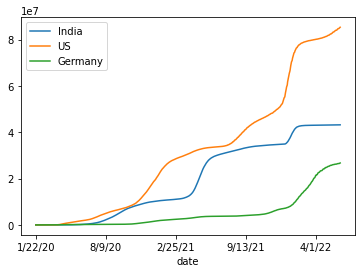

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

# Data Type Date

In [11]:

df_plot.head()

,date,India,US,Germany
0,1/22/20,0,1,0
1,1/23/20,0,1,0
2,1/24/20,0,2,0
3,1/25/20,0,2,0
4,1/26/20,0,5,0


In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [13]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:

df_plot.head()

,date,India,US,Germany
0,2020-01-22,0,1,0
1,2020-01-23,0,1,0
2,2020-01-24,0,2,0
3,2020-01-25,0,2,0
4,2020-01-26,0,5,0


In [15]:
df_plot.to_csv('COVID_small_flat_table.csv',sep=';',index=False)

# Relational data model - defining a primary key

In [16]:
data_path='time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180347,180419,180520,180584,180615,180615,180688,180741,180784,180864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276101,276221,276221,276310,276342,276401,276415,276468,276518,276583
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265884,265887,265889,265889,265889,265897,265900,265904,265909,265920
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,43067,43067,43067,43067,43067,43224,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [17]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [18]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()


,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,180347,180419,180520,180584,180615,180615,180688,180741,180784,180864
1,no,Albania,0,0,0,0,0,0,0,0,...,276101,276221,276221,276310,276342,276401,276415,276468,276518,276583
2,no,Algeria,0,0,0,0,0,0,0,0,...,265884,265887,265889,265889,265889,265897,265900,265904,265909,265920
3,no,Andorra,0,0,0,0,0,0,0,0,...,42894,42894,42894,43067,43067,43067,43067,43067,43224,43224
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [19]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [20]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [21]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [22]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [23]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('COVID_relational_confirmed.csv',sep=';',index=False)

In [24]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

             date state country  confirmed
246795 2022-06-05    no      US   84762022
247080 2022-06-06    no      US   84882287
247365 2022-06-07    no      US   85003945
247650 2022-06-08    no      US   85214036
247935 2022-06-09    no      US   85329656


# Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [25]:
data_path='time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15963,15969,15978,15978,15978,15978,16032,16052,16065,16084
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,56512,56580,56648,56648,56648,56648,56895,56955,57024,57079
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5707,5710,5714,5714,5714,5714,5719,5733,5734,5744
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6500,6508,6512,6512,6512,6512,6534,6535,6540,6544
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15073,15077,15084,15084,15084,15084,15096,15112,15115,15133


In [26]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [27]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [28]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [29]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [30]:
pd_relational_model_all.to_csv('COVID_relational_confirmed.csv',sep=';',index=False)

In [31]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

              date    state country  confirmed
247080  2020-01-22  Alabama      US          0
247081  2020-01-22  Alabama      US          0
247082  2020-01-22  Alabama      US          0
247083  2020-01-22  Alabama      US          0
247084  2020-01-22  Alabama      US          0
...            ...      ...     ...        ...
3154615 2022-06-09  Wyoming      US      10403
3154616 2022-06-09  Wyoming      US       5702
3154617 2022-06-09  Wyoming      US        200
3154618 2022-06-09  Wyoming      US       2371
3154619 2022-06-09  Wyoming      US       1604

[2907540 rows x 4 columns]
